In [5]:
from scipy import *
import numpy as np
from pylab import *
from astropy.io import fits
import WLanalysis

In [61]:
conv_input=fits.open('WLconv_z1100.00_0001r.fits')[0].data
conv_smooth = WLanalysis.smooth(conv_input2, 2048/209.*5)

In [62]:
conv_tt=fits.open(mapdir+'kappa_fidu0000_tt.fits')[0].data
conv_eb=fits.open(mapdir+'kappa_fidu0000_eb.fits')[0].data
conveb_smooth = WLanalysis.smooth(conv_eb, 5.0)
convtt_smooth = WLanalysis.smooth(conv_tt, 5.0)

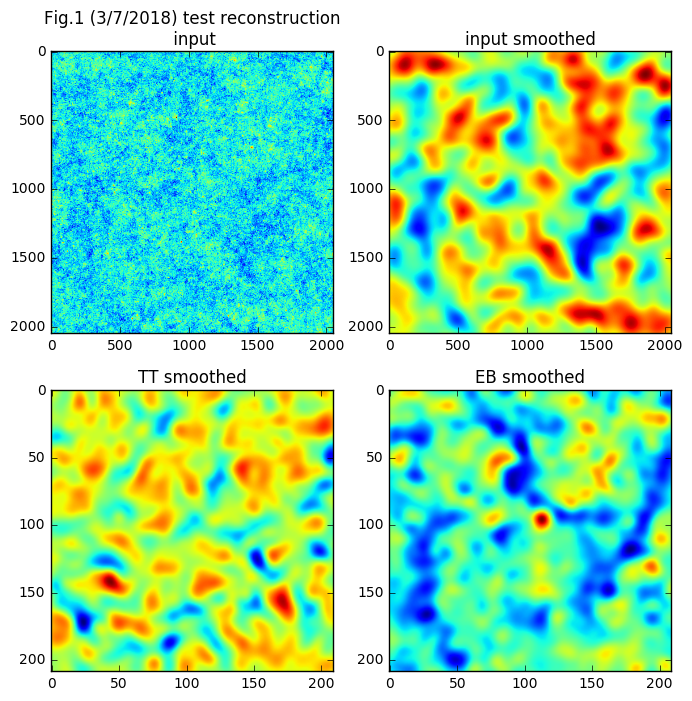

In [77]:
f, ((ax1,ax2), (ax3, ax4)) = subplots(2, 2, figsize=(8,8))
ilevel = 3*std(conv_smooth)
ax1.imshow(conv_input,aspect='auto')
ax2.imshow(conv_smooth,aspect='auto')
ax3.imshow(convtt_smooth,aspect='auto')
ax4.imshow(conveb_smooth,aspect='auto')
ax1.set_title('Fig.1 (3/7/2018) test reconstruction\n input')
ax2.set_title('input smoothed')
ax3.set_title('TT smoothed')
ax4.set_title('EB smoothed')

show()

In [78]:
print conv_tt.shape, conv_input[::10,::10].shape

(209, 209) (205, 205)


In [66]:
ell,auto_ii = WLanalysis.CrossCorrelate(conv_input[::10,::10], conv_input[::10,::10])
ell,cross_itt = WLanalysis.CrossCorrelate(conv_input[::10,::10], conv_tt[:205,:205])
ell,cross_ieb = WLanalysis.CrossCorrelate(conv_input[::10,::10], conv_eb[:205,:205])
ell,cross_ite = WLanalysis.CrossCorrelate(conv_tt[:205,:205], conv_eb[:205,:205])

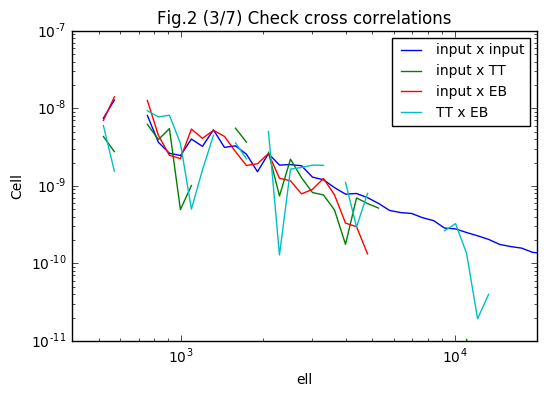

In [83]:
f, ax = subplots(1,1, figsize=(6,4))
ax.loglog(ell, 2*pi*auto_ii/ell**2, '-',label='input x input')
ax.loglog(ell, 2*pi*cross_itt/ell**2, '-',label='input x TT')
ax.loglog(ell, 2*pi*cross_ieb/ell**2, '-',label='input x EB')
ax.loglog(ell, 2*pi*cross_ite/ell**2, '-',label='TT x EB')
ax.legend(loc=0,fontsize=10)
ax.set_xlim(400,2e4)
ax.set_ylim(1e-11,1e-7)
ax.set_title('Fig.2 (3/7) Check cross correlations')
ax.set_xlabel('ell')
ax.set_ylabel('Cell')
show()